<a href="https://colab.research.google.com/github/MiteshRege/Recipe-Recommendation-System/blob/main/Xception_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Major Project**
## Food Detection modal training 
### Xception - Model

In [ ]:
! pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 438 kB 71.4 MB/s 
     |████████████████████████████████| 5.9 MB 56.7 MB/s 
     |████████████████████████████████| 1.7 MB 62.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
!nvidia-smi

Sun Nov 13 16:33:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as imgen
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,GlobalAveragePooling2D
from keras.models import Model,Sequential,load_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix
from keras.applications.xception import Xception
from keras.callbacks import EarlyStopping,ModelCheckpoint

###  **Reading and Augmenting Data**

In [ ]:
traingen = imgen(preprocessing_function=keras.applications.xception.preprocess_input,
                #rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip=True
                )

valgen = imgen(preprocessing_function=keras.applications.xception.preprocess_input,
                #rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip=True
                )

testgen = imgen(preprocessing_function=keras.applications.xception.preprocess_input)
               #rescale=1./255)

In [ ]:
train_data = traingen.flow_from_directory("/content/drive/MyDrive/Major Project Dataset/Dataset/train",
                                         target_size=(299,299),
                                          seed = 123,
                                          batch_size=32,
                                          class_mode = "categorical"
                                         )
val_data = valgen.flow_from_directory("/content/drive/MyDrive/Major Project Dataset/Dataset/val",
                                     target_size=(299,299),
                                      seed = 123,
                                      batch_size=32,
                                      class_mode = "categorical"
                                     )

test_data = testgen.flow_from_directory("/content/drive/MyDrive/Major Project Dataset/test",
                                       shuffle=False,
                                        target_size = (299,299),
                                        seed = 123,
                                        batch_size = 32,
                                        class_mode = "categorical"
                                       )

Found 3996 images belonging to 20 classes.
Found 1250 images belonging to 20 classes.
Found 585 images belonging to 20 classes.


**Getting the calass names**

In [ ]:
cl = train_data.class_indices
classes = list(cl.keys())
classes

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

**Distribution of classes**

In [ ]:
cl_fq = train_data.classes

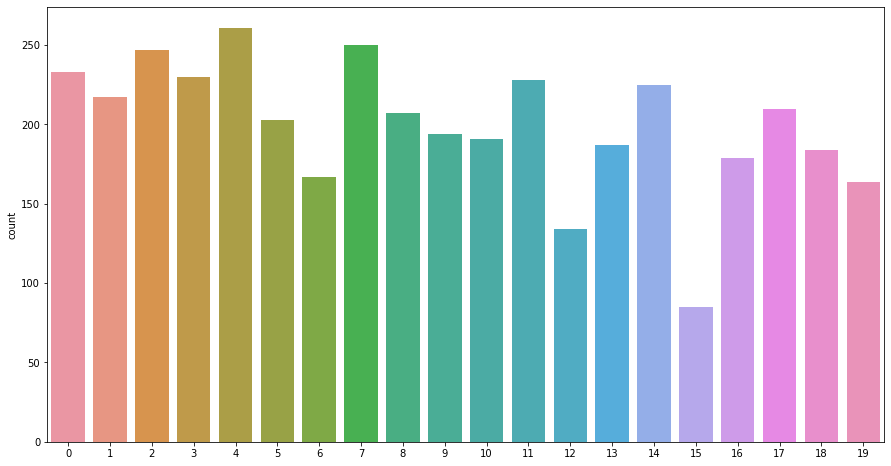

In [ ]:
plt.figure(figsize=[15,8])
sns.countplot(x =cl_fq);

**Taking a look at some Images**

In [ ]:
# one Batch
x,y = next(train_data)
x.shape

(32, 299, 299, 3)

In [ ]:
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

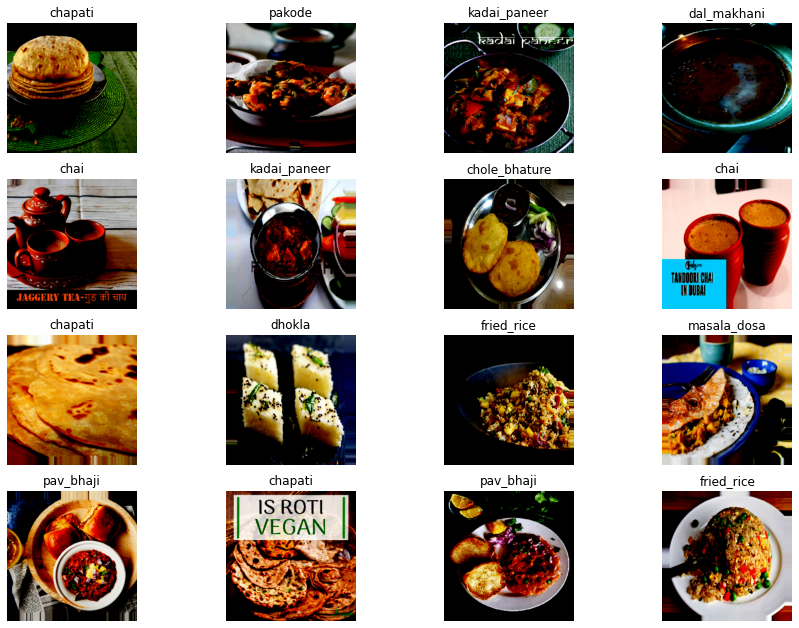

In [ ]:
plotImages(x,y)

## **Model Building**

**Getting a Pre-Trained Model**

In [ ]:
base_model = Xception(include_top=False,
                              weights="imagenet",
                              input_shape=(299,299,3),
                        )
base_model.trainable = False

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
# Transfer to main model
image_input = Input(shape=(299,299,3))
x = base_model(image_input,training = False)
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation = "relu")(x)
image_output = Dense(20,activation="softmax")(x)
model = Model(image_input,image_output)

**Compile**

In [ ]:
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=["accuracy"])

**Callbacks**

In [ ]:
my_calls = [EarlyStopping(monitor="val_accuracy",patience=3),
            ModelCheckpoint("Model.h5",verbose= 1 ,save_best_only=True)]

**Train**

In [ ]:
hist = model.fit(train_data,epochs=22,validation_data=val_data,callbacks=my_calls)

Epoch 1/22
 81/125 [==================>...........] - ETA: 6:15 - loss: 1.2582 - accuracy: 0.6665

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 87/125 [===================>..........] - ETA: 5:24 - loss: 1.2217 - accuracy: 0.6741

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


125/125 [==============================] - ETA: 0s - loss: 1.0196 - accuracy: 0.7215
Epoch 1: val_loss improved from inf to 0.56943, saving model to Model.h5
125/125 [==============================] - 1432s 11s/step - loss: 1.0196 - accuracy: 0.7215 - val_loss: 0.5694 - val_accuracy: 0.8456
Epoch 2/22
125/125 [==============================] - ETA: 0s - loss: 0.3892 - accuracy: 0.8886
Epoch 2: val_loss improved from 0.56943 to 0.52223, saving model to Model.h5
125/125 [==============================] - 224s 2s/step - loss: 0.3892 - accuracy: 0.8886 - val_loss: 0.5222 - val_accuracy: 0.8376
Epoch 3/22
125/125 [==============================] - ETA: 0s - loss: 0.2960 - accuracy: 0.9104
Epoch 3: val_loss improved from 0.52223 to 0.41295, saving model to Model.h5
125/125 [==============================] - 220s 2s/step - loss: 0.2960 - accuracy: 0.9104 - val_loss: 0.4130 - val_accuracy: 0.8808
Epoch 4/22
125/125 [==============================] - ETA: 0s - loss: 0.2174 - accuracy: 0.9342
Ep

**Test**

In [ ]:
model.evaluate(test_data)

19/19 [==============================] - 191s 11s/step - loss: 0.8558 - accuracy: 0.8051


[0.8558000326156616, 0.8051282167434692]

**Accuracy and loss**

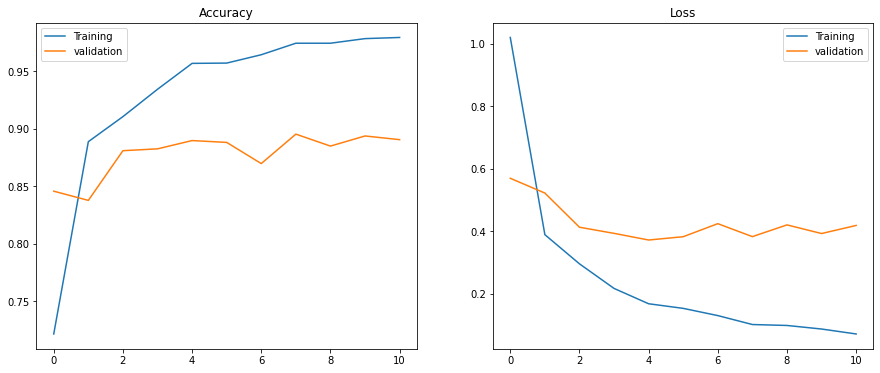

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

**Saved model**

In [ ]:
saved_model = load_model("./Model.h5")

**Making Predictions**

In [ ]:
pred = saved_model.predict(test_data,verbose=1)

19/19 [==============================] - 5s 251ms/step


In [ ]:
pred = [np.argmax(i) for i in pred]
y_test = test_data.classes

In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        25
           1       0.76      0.69      0.72        32
           2       1.00      0.81      0.90        37
           3       0.82      0.66      0.73        35
           4       0.78      0.83      0.81        30
           5       0.72      0.53      0.61        34
           6       0.96      0.92      0.94        24
           7       0.64      1.00      0.78        18
           8       0.93      0.93      0.93        28
           9       0.93      0.96      0.95        28
          10       0.96      0.65      0.78        40
          11       0.89      0.68      0.77        37
          12       0.74      0.92      0.82        25
          13       0.76      0.88      0.81        25
          14       0.60      0.90      0.72        20
          15       0.67      0.80      0.73        25
          16       0.94      0.67      0.78        45
          17       0.76    

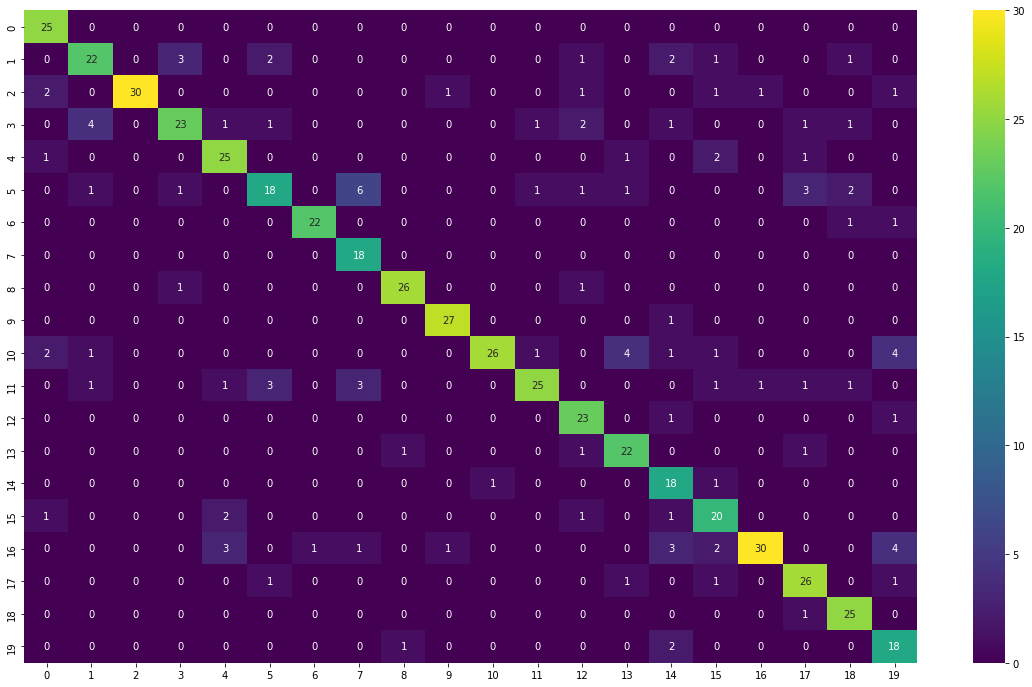

In [ ]:
plt.figure(figsize=[20,12])
sns.heatmap(confusion_matrix(pred,y_test),annot=True,fmt="d",cmap="viridis");